In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Data Visualization

In [2]:
df = pd.read_csv('/kaggle/input/daily-data/data_daily.csv')
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [3]:
df['# Date'] = pd.to_datetime(df['# Date'])
df.set_index('# Date', inplace = True)
df.head()

,Receipt_Count
# Date,
2021-01-01,7564766
2021-01-02,7455524
2021-01-03,7095414
2021-01-04,7666163
2021-01-05,7771289


In [4]:
df.tail()

,Receipt_Count
# Date,
2021-12-27,10350408
2021-12-28,10219445
2021-12-29,10313337
2021-12-30,10310644
2021-12-31,10211187


## Feature Engineering

In [5]:
def create_features(x):
    x = df.copy()
    x['month'] = x.index.month
    x['day_of_week'] = x.index.day_of_week
    x['quarter'] = x.index.quarter
    x['day_of_year'] = x.index.day_of_year
    return x

In [6]:
def lag_features(n):
    x = df.copy()
    for i in range(1, n+1):
        x[f'lag_{i}'] = x['Receipt_Count'].shift(i)
    x.fillna(x.mean(), inplace=True)
    return x   

In [7]:
def combine_features(df, n):
    x = df.copy()
    lagged_features = lag_features(n)
    created_features = create_features(x)
    combined_df = pd.concat([lagged_features, created_features.drop('Receipt_Count', axis=1)], axis=1)
    return combined_df

In [8]:
x = combine_features(df, 10)
#x = create_features(df)

## Train Test Split

In [9]:
df_train = x.iloc[:300, :]
df_test = x.iloc[300:, :]

In [10]:
df_train.head()

,Receipt_Count,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,month,day_of_week,quarter,day_of_year
# Date,,,,,,,,,,,,,,,
2021-01-01,7564766,8.822762e+06,8.818663e+06,8.814534e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,4,1,1
2021-01-02,7455524,7.564766e+06,8.818663e+06,8.814534e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,5,1,2
2021-01-03,7095414,7.455524e+06,7.564766e+06,8.814534e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,6,1,3
2021-01-04,7666163,7.095414e+06,7.455524e+06,7.564766e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,0,1,4
2021-01-05,7771289,7.666163e+06,7.095414e+06,7.455524e+06,7.564766e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,1,1,5


In [11]:
#features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6']
target = 'Receipt_Count'

X_train = df_train.drop(target, axis = 1)
X_test = df_test.drop(target, axis = 1)

y_train = df_train[target]
y_test = df_test[target]

In [12]:
X_train.head()

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,month,day_of_week,quarter,day_of_year
# Date,,,,,,,,,,,,,,
2021-01-01,8.822762e+06,8.818663e+06,8.814534e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,4,1,1
2021-01-02,7.564766e+06,8.818663e+06,8.814534e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,5,1,2
2021-01-03,7.455524e+06,7.564766e+06,8.814534e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,6,1,3
2021-01-04,7.095414e+06,7.455524e+06,7.564766e+06,8.810643e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,0,1,4
2021-01-05,7.666163e+06,7.095414e+06,7.455524e+06,7.564766e+06,8.806366e+06,8.800983e+06,8.797505e+06,8.794966e+06,8.793085e+06,8.789335e+06,1,1,1,5


In [13]:
class StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.var_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.var_ = np.var(X, axis=0)
        self.scale_ = np.sqrt(self.var_ + 1e-10)  # Adding a small value to avoid division by zero
        return self

    def transform(self, X):
        X_scaled = (X - self.mean_) / self.scale_
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        X_scaled = self.transform(X)
        return X_scaled

    def inverse_transform(self, X_scaled):
        X_original = X_scaled * self.scale_ + self.mean_
        return X_original

# Usage
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [14]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [15]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mean = None  # mean and std will hold the training data statistics
        self.std = None
    
    def fit(self, X, y):
        # Compute and store the mean and std of the training data
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        
        # Normalize X using training data statistics
        X = (X - self.mean) / self.std
        
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            y_predicted = self._predict(X)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def _predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        # Normalize X using training data statistics
        X = (X - self.mean) / self.std
        return self._predict(X)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [17]:
print(((y_pred_train - y_train)**2 / len(y_train)).sum())
print(((y_pred_test - y_test)**2 / len(y_test)).sum())

1.9706516372657947
1.345251632576484


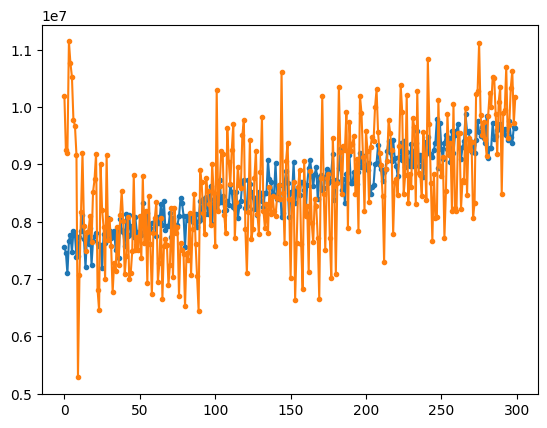

In [18]:
plt.plot(scaler.inverse_transform(y_train.values), marker = '.')
plt.plot(scaler.inverse_transform(y_pred_train), marker = '.')

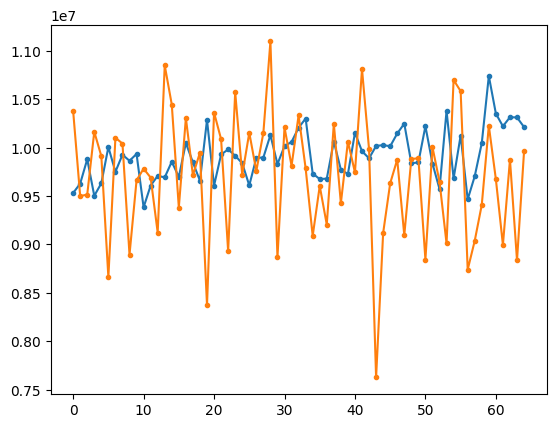

In [19]:
plt.plot(scaler.inverse_transform(y_test.values), marker = '.')
plt.plot(scaler.inverse_transform(y_pred_test), marker = '.')

In [20]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump((model.weights, model.bias), f)